<center> <h1>Target Classifaction for a Market Campaign</h1> </center>

### What is this dataset trying to predict?<br>
If given data about a client we can predict if he will subsrice to a term deposit or not

### What is a Term depost?<br>
In a normal bank acount the client has the option to witdraw money from the acount at any given time.<br> A Term deposit is a fixed-term investment which means the client has to leave money in the bank without the option to withdraw from it for a fixed period/

### What is in it for me and  the bank?
The Banks are willing to pay more interest for a term deposit.<br>
The money will stay deposited for a fixed time period, This helps them better manage their money.

## Feature Description

### Bank client data

Age: age of the client

Job: type of job :admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown

Marital: is the martial status of the client:married,single,divorced

Education: the level of education of the target: primary(elemetary school),secondary(middle school or high school in US),tertiary (any level of education pursued beyond high school),unknown

Default: has credit in default?

Balance: The clients saving in the bank

Housing: has housing loan?

loan: has personal loan?


### Related to last contact of current campaign:

Contact: contact communication type: cellular, telephone

Day:  last contact day of the week : mon, tue, wed , thu , fri

Month:  last contact month of year: jan, feb,...., nov, dec.

Duration:  last contact duration, in seconds (numeric). this feature affects the model to much cause it basically we want to predict to answer before the last contact.

### Other attributes

Campaign: number of contacts performed during this campaign and for this client(includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 means 'was not previously contacted)

Previous: number of contacts performed before this campaign and for this client

Poutcome: outcome of the previous marketing campaign -failure, nonexistent, success

### Target

deposit: Tells if the bank client subscribed a term depsit

## Libraries :

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## First look

In [69]:
bank = pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [37]:
bank.shape

(11162, 17)

<center> <h1>Data preprocessing</h1> </center>

**Steps involves in Data Preprocessing**
- Data Cleaning
- Identifying and removing outliers(visulazition)
- Endcoding categorial variables

### Data Cleaning

In [72]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


There data seems already clean, lets check!

In [73]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Yes, the data is alreday clean

### Identifying and removing outliers

In [38]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


We can see already 2 things.
1. There are 7 numeric features and 10 categoric
2. There dont some to be any missing data but were leaving that for later

In [39]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


This guves us an even better picture about the datasets and the clients
1. About Age we can tell that most clients are between 30 and 50 with the mean and std
2. We know all clients are at a legal age(18 and above)thanks to min
3. While there seem to be some clients with minus in the balance most are in the plus
4. most clients havent been contacted for at least half a month(day, mean)
5. all clients have been contacted at least 1 time (campaign, min)
6. more than half of the clients have never been contacted in the previous campaign (pdays, 50%)

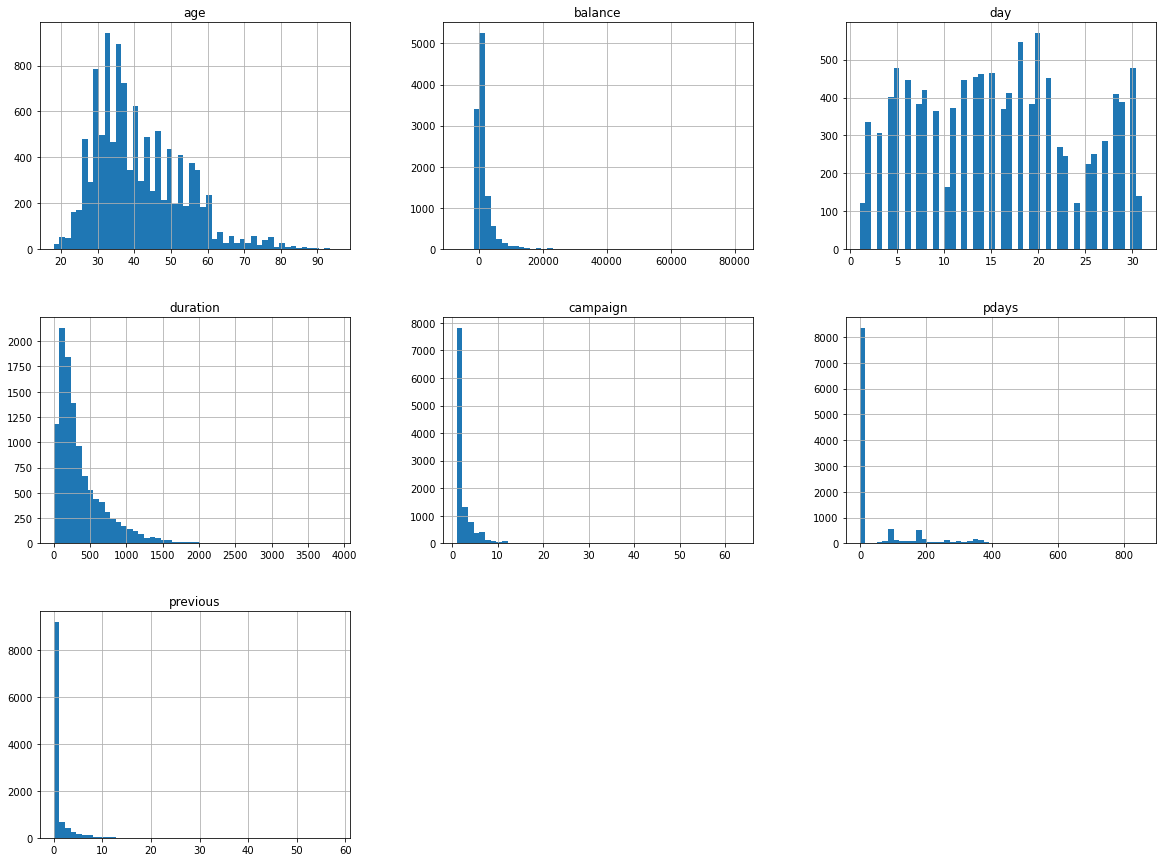

In [53]:
bank.hist(bins=50, figsize = (20,15))
plt.show()

Some thinks seem to be diffrent when we watch the histograms
1. The highest amount of people are probably in there 30s
2. more people than i thougth are minus or close the zero in balance
3. day seems to be actually almost evely distrubted

In [14]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [17]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# ------------------------------------------------------------------------------------------------------------

<center> <h1>Price Prediction Of Diamonds: Regression</h1> </center>

In this dataset we want to predict the prices of diamonds if we have their features and their dimensions

## Feature Description

This Dataset contains a collection of about 54 thousand diamond

**unamed:** The index counter

**Carat:** Carat is the diamons physical weight measure

**Cut:** Describe cut quality of the diamond. Quality in increasing order: *fair, Good, Very Good, Premium, Ideal*

**Color:** Color of the diamond from *J being the worst and D the best*

**Clarity:** describes how obvious inclusions or blemishes are within the diamond, in order from worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF.

**Depth%:** The height of a diamond, measured from the culet to the table, divided by its average girdle diameter

**Table%:** The width of the diamond's table expressed as a percentage of its average diameter

**Price:** The price of the diamond, the target we want to predict.

**X:** length mm

**Y:** width mm

**Z:**} height mm

![](pictures/Cut-Anatomy-of-Diamond.png)

## Libraries :

## First look

In [10]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
diamonds.shape

(53940, 11)

<center> <h1>Data preprocessing</h1> </center>

**Steps involves in Data Preprocessing**
- Data Cleaning
- Identifying and removing outliers(visulazition)
- Endcoding categorial variables

### Data Cleaning

In [67]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


There seems to be no missing data! Lets check

In [68]:
diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

There is no missing data so we can say the data is already cleaned

### Identifying and removing outliers

In [57]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


some things we learn
1. unnamed seems to have no purpose on a dataframe as its only a index
2. most diamons weight close to 1 carat but the haviest is more than 5 times heavier, it is probalbly an anomly

<function matplotlib.pyplot.show(close=None, block=None)>

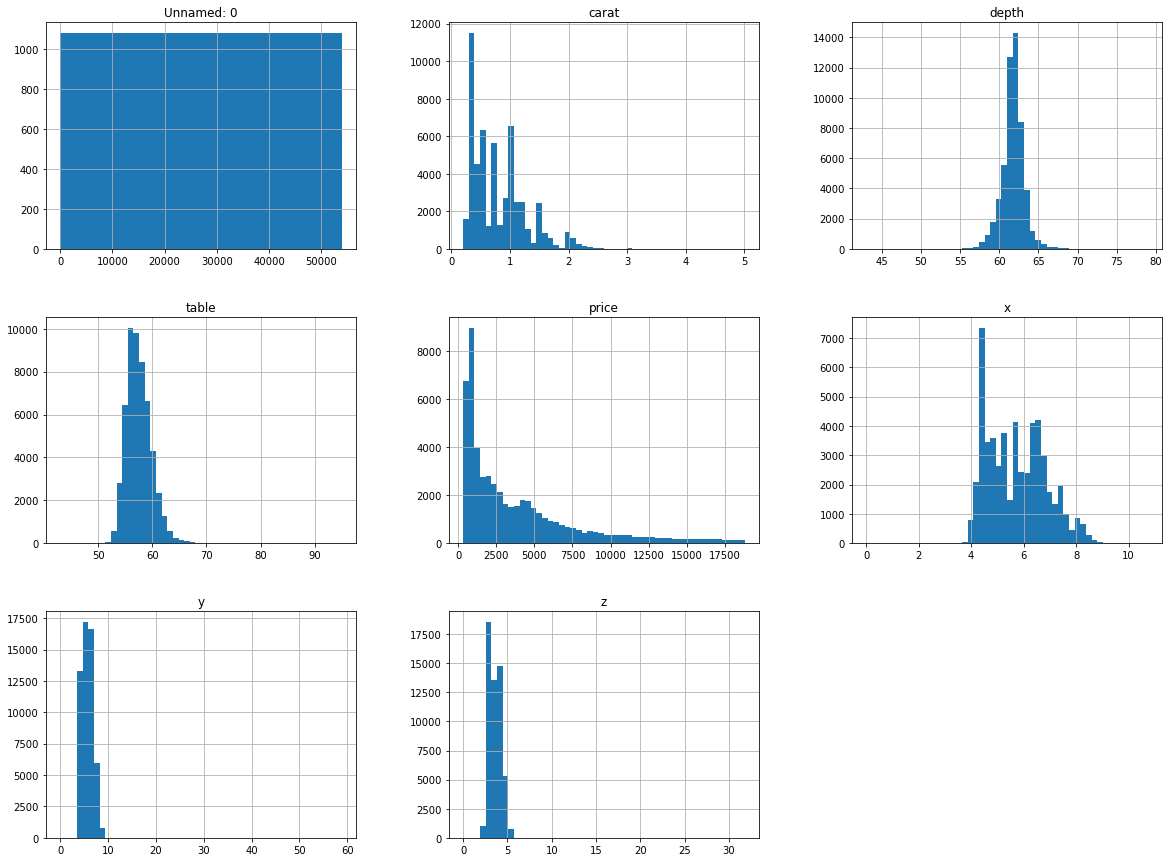

In [63]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show

- unnamed shows us why it should be deleted
- the suspect of a an anomoly in carat seems to be true
- depth and table shows us nice bell curves

In [12]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [18]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000
